# Is there a correlation between the number of best-selling books by an author on Amazon and the average ratings of those books?

This retrospective study analyzes the entire population of authors on the Amazon bestseller list. It explores the relationship between the number of well-known books published by each author and the average star ratings those books received from readers. The data was collected by scraping the first 50 books from Amazon's Best Sellers lists for each year from 2009 to 2019 using Python. Any missing details were supplemented using the GoodReads API. The dataset was finalized in October 2020 and includes variables such as book title, author, user rating (on a scale of 0 to 5 stars), number of reviews, price, year, and genre. Since the rate was established six years ago, it could now affect the average rate today. Additionally, if one book pays Amazon more to be featured, Amazon might still promote it despite its high sales. Furthermore, public opinions about the book may have been influenced by bots.

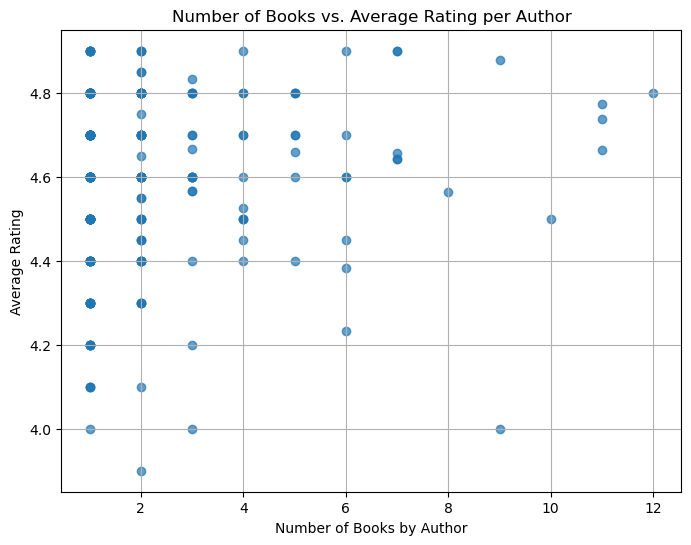

Pearson Correlation Coefficient (R): 0.068
Coefficient of Determination (R²): 0.005


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load CSV
df = pd.read_csv("books.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Find relevant columns
author_col = [col for col in df.columns if "author" in col.lower()][0]
rating_col = [col for col in df.columns if "rating" in col.lower()][0]

# Group by author: count books and average rating
author_stats = df.groupby(author_col).agg(
    num_books=(author_col, "count"),
    avg_rating=(rating_col, "mean")
).reset_index()

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(author_stats["num_books"], author_stats["avg_rating"], alpha=0.7)
plt.xlabel("Number of Books by Author")
plt.ylabel("Average Rating")
plt.title("Number of Books vs. Average Rating per Author")
plt.grid(True)
plt.show()

# Pearson correlation (R)
r, p_value = pearsonr(author_stats["num_books"], author_stats["avg_rating"])

# Coefficient of determination (R²)
r2 = r**2

print(f"Pearson Correlation Coefficient (R): {r:.3f}")
print(f"Coefficient of Determination (R²): {r2:.3f}")

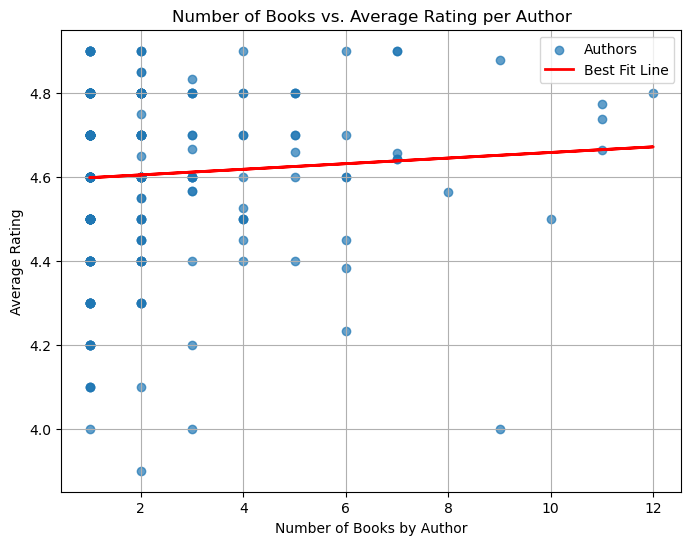

Pearson Correlation Coefficient (R): 0.068
Coefficient of Determination (R²): 0.005


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Load CSV
df = pd.read_csv("books.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Find relevant columns
author_col = [col for col in df.columns if "author" in col.lower()][0]
rating_col = [col for col in df.columns if "rating" in col.lower()][0]

# Group by author: count books and average rating
author_stats = df.groupby(author_col).agg(
    num_books=(author_col, "count"),
    avg_rating=(rating_col, "mean")
).reset_index()

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(author_stats["num_books"], author_stats["avg_rating"], alpha=0.7, label="Authors")

# Add line of best fit
x = author_stats["num_books"]
y = author_stats["avg_rating"]
m, b = np.polyfit(x, y, 1)  # linear regression (slope, intercept)
plt.plot(x, m*x + b, color="red", linewidth=2, label="Best Fit Line")

plt.xlabel("Number of Books by Author")
plt.ylabel("Average Rating")
plt.title("Number of Books vs. Average Rating per Author")
plt.legend()
plt.grid(True)
plt.show()

# Pearson correlation (R)
r, p_value = pearsonr(x, y)

# Coefficient of determination (R²)
r2 = r**2

print(f"Pearson Correlation Coefficient (R): {r:.3f}")
print(f"Coefficient of Determination (R²): {r2:.3f}")

The relationship we observed is weak but positive, with a correlation coefficient (R) of 0.068. This suggests that the relationship is almost nonexistent. The coefficient of determination (R²) is 0.005, indicating that less than 1% of the variation in average ratings can be explained by the number of books an author has published.

While this analysis offers some insights, it is not conclusive. Scatterplots can appear noisy when the correlation is very weak, and data errors—whether from AI processing or manual entry—could affect the results. Nonetheless, the findings suggest that the number of books an author has does not significantly impact their average rating.